In [50]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence


In [51]:
data = pd.read_csv("df.csv")
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical


### 1. Vytvoř korelační matici a podívej se, který ukazatel má největší vliv na indikátor Y

In [52]:
data_corr = data.drop(columns=["Company", "Sector"])
data_corr.corr()

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
CR,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.018690,-0.040483
DA,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,0.164599,-0.120993
FL,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.759323,0.032588
OPM,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.051308,0.021409
RT,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,-0.046290,0.097708
TAT,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.301222,0.017872
DE,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,0.724604,-0.025348
Y,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,1.000000,-0.001363
PT,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,-0.001363,1.000000


Největší vliv má FL - financial leverage, korelační koeficient 0.759323

<AxesSubplot: xlabel='Y', ylabel='FL'>

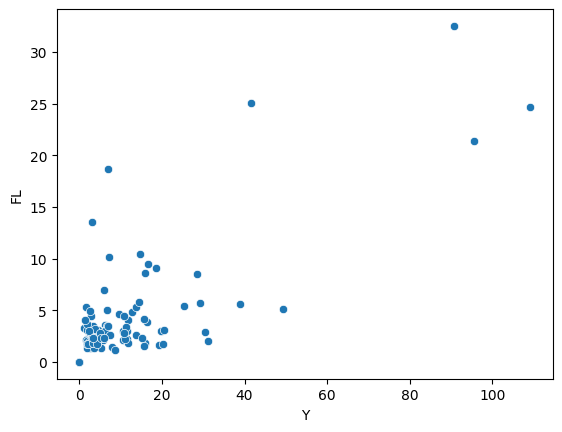

In [53]:
sns.scatterplot(data=data_corr, x="Y", y="FL")

### 2. Vytvoř regresní model, který bude mít koeficient Y jako vysvětlovanou proměnnou.

In [54]:
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.45e-18
Time:                        14:08:00   Log-Likelihood:                -375.94
No. Observations:                 100   AIC:                             769.9
Df Residuals:                      91   BIC:                             793.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0176      5.347     -2.061      0.042     -21.638      -0.397
CR             1.5014      1.240      1.211      0.229      -0.961       3.964
DA            -5.2206      9.370     -0.557      0.579     -23.834      13.392
FL             3.0104      1.060      2.840      0.006       0.905       5.116
OPM           23.4665      8.076      2.906      0.005       7.425      39.508
RT            -0.0063      0.021     -0.300      0.765      -0.048       0.035
TAT            8.4254      2.351      3.584      0.001       3.756      13.095
DE            -0.7283      2.066     -0.352      0.725      -4.833       3.376
PT            -0.0644      0.096     -0.669      0.505      -0.256       0.127
==============================================================================
Omnibus:                       29.136   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.551
Skew:                           0.881   Prob(JB):                     8.88e-23
Kurtosis:                       7.611   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

nevýznamné koeficienty (P>|t| větší než 0.05): CR, DA, RT, DE, PT

### Nový model

In [55]:
formula = "Y ~ FL + OPM + TAT"
mod_new = smf.ols(formula=formula, data=data)
results_new = mod_new.fit()
results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           7.99e-22
Time:                        14:08:00   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188      2.865     -3.637      0.000     -16.106      -4.732
FL             2.5281      0.208     12.149      0.000       2.115       2.941
OPM           24.8478      7.542      3.295      0.001       9.878      39.818
TAT            8.5518      2.205      3.879      0.000       4.176      12.928
==============================================================================
Omnibus:                       26.748   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.291
Skew:                           0.876   Prob(JB):                     2.71e-17
Kurtosis:                       6.904   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Odhadni ukazatel Y s využitím tvého modelu

In [56]:
data["Y_predicted"] = results_new.predict(data)
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358


###  Vypočítej rozdíl mezi odhadem koeficientu a jeho skutečnou hodnotou

In [57]:
data["Difference"] = data["Y_predicted"] - data["Y"]
data[data["Difference"] == data["Difference"].max()]

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,Difference
79,SYXLy,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.4,Industrials,41.779545,34.809545


Největší rozdíl je u akcií společnosti SYXLy => její akcie jsou nejvíce podhodnocené

### Bonus 1: Sestav model s využitím robustní regrese

In [58]:
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
model_rlm = smf.rlm(formula=formula, data=data)
results_rlm = model_rlm.fit()
results_rlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       91
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 10 Nov 2023                                         
Time:                        14:08:00                                         
No. Iterations:                    37                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4961      3.453     -3.039      0.002     -17.265      -3.728
CR             2.0316      0.801      2.537      0.011       0.462       3.601
DA            -0.4762      6.052     -0.079      0.937     -12.338      11.386
FL             3.6694      0.685      5.360      0.000       2.328       5.011
OPM           16.3810      5.216      3.140      0.002       6.158      26.604
RT            -0.0029      0.014     -0.216      0.829      -0.029       0.024
TAT            5.2670      1.518      3.469      0.001       2.291       8.243
DE            -2.5507      1.335     -1.911      0.056      -5.166       0.065
PT            -0.0878      0.062     -1.412      0.158      -0.210       0.034
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

nevýznamné koeficienty (P>|t| větší než 0.05): CR, DA, RT, DE, PT

In [59]:
formula = "Y ~ FL + OPM + TAT"
model_rlm_new = smf.rlm(formula=formula, data=data)
results_rlm_new = model_rlm_new.fit()
results_rlm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       96
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 10 Nov 2023                                         
Time:                        14:08:00                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7581      1.822     -3.709      0.000     -10.329      -3.187
FL             2.2847      0.132     17.263      0.000       2.025       2.544
OPM           17.6621      4.797      3.682      0.000       8.261      27.063
TAT            5.2533      1.402      3.747      0.000       2.505       8.001
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [60]:
data["Y_predicted_rlm"] = results_rlm_new.predict(data)
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,Difference,Y_predicted_rlm
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359,-1.447641,1.752274
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512,21.897288
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718,-0.835282,5.687099
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512,9.538512,12.058852
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358,1.701358,1.089388


In [61]:
data["Difference_rlm"] = data["Y_predicted_rlm"] - data["Y"]
data[data["Difference_rlm"] == data["Difference_rlm"].max()]

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,Difference,Y_predicted_rlm,Difference_rlm
79,SYXLy,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.4,Industrials,41.779545,34.809545,39.096267,32.126267


největší rozdíl je opět u akcií společnosti SYXLy

### Bonus 2: Použij původní model a vyčísli Cookovu vzdálenost pro všechny hodnoty. Vyřaď všechny akcie s Cookovou vzdáleností vyšší než 1 a přepočítej regresní model. 

In [62]:
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
model_cook = smf.ols(formula=formula, data=data)
results_cook = model_cook.fit()
influence = OLSInfluence(results_cook)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,Difference,Y_predicted_rlm,Difference_rlm,Cook Distance
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359,-1.447641,1.752274,-0.197726,0.000046
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512,21.897288,14.637288,0.037578
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718,-0.835282,5.687099,-2.092901,0.000173
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512,9.538512,12.058852,5.888852,0.008283
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358,1.701358,1.089388,1.089388,0.000082


In [63]:
data = data[data['Cook Distance'] < 1]
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
model_fin = smf.ols(formula=formula, data=data)
res_fin = model_fin.fit()
res_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     24.76
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.06e-19
Time:                        14:08:00   Log-Likelihood:                -367.74
No. Observations:                  99   AIC:                             753.5
Df Residuals:                      90   BIC:                             776.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0524      5.364     -1.128      0.262     -16.708       4.604
CR             1.4779      1.186      1.246      0.216      -0.878       3.834
DA           -16.4346      9.678     -1.698      0.093     -35.661       2.792
FL             0.8796      1.228      0.716      0.476      -1.561       3.320
OPM           22.9074      7.728      2.964      0.004       7.555      38.260
RT            -0.0003      0.020     -0.013      0.990      -0.040       0.040
TAT            7.9619      2.254      3.533      0.001       3.484      12.440
DE             4.2726      2.560      1.669      0.099      -0.814       9.359
PT            -0.0192      0.093     -0.206      0.837      -0.204       0.166
==============================================================================
Omnibus:                       20.217   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.822
Skew:                           0.649   Prob(JB):                     2.05e-12
Kurtosis:                       6.371   Cond. No.                         640.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
data["Y_predicted_cook"] = res_fin.predict(data)
data.head()

C:\Users\helen\AppData\Local\Temp\ipykernel_2852\1971778840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Y_predicted_cook"] = res_fin.predict(data)


,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,Difference,Y_predicted_rlm,Difference_rlm,Cook Distance,Y_predicted_cook
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359,-1.447641,1.752274,-0.197726,0.000046,1.033487
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512,21.897288,14.637288,0.037578,27.326216
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718,-0.835282,5.687099,-2.092901,0.000173,11.510453
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512,9.538512,12.058852,5.888852,0.008283,14.059466
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358,1.701358,1.089388,1.089388,0.000082,-1.093074


In [65]:
data["Difference_cook"] = data["Y_predicted_cook"] - data["Y"]
data[data["Difference_cook"] == data["Difference_cook"].max()]

C:\Users\helen\AppData\Local\Temp\ipykernel_2852\3191218799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Difference_cook"] = data["Y_predicted_cook"] - data["Y"]


,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,Difference,Y_predicted_rlm,Difference_rlm,Cook Distance,Y_predicted_cook,Difference_cook
79,SYXLy,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.4,Industrials,41.779545,34.809545,39.096267,32.126267,0.575,39.636459,32.666459


největší rozdíl je opět u akcií společnosti SYXLy